In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")

In [2]:
# provide the base path for project
base_path = r"C:\Users\arsha\OneDrive\Desktop\Insurance-Premium-main"

In [3]:
# read data
data = pd.read_csv(os.path.join(base_path, r"data/raw/insurance.csv"))

In [4]:
data.shape

(1338, 7)

In [5]:
# display top 5 rows of data
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [32]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

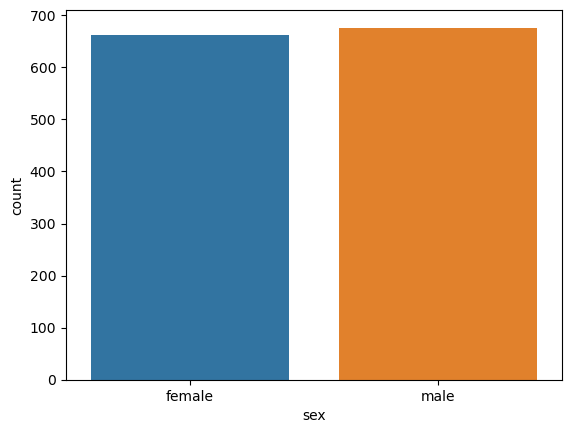

In [33]:
sns.countplot(x=data["sex"])

<AxesSubplot:xlabel='smoker', ylabel='count'>

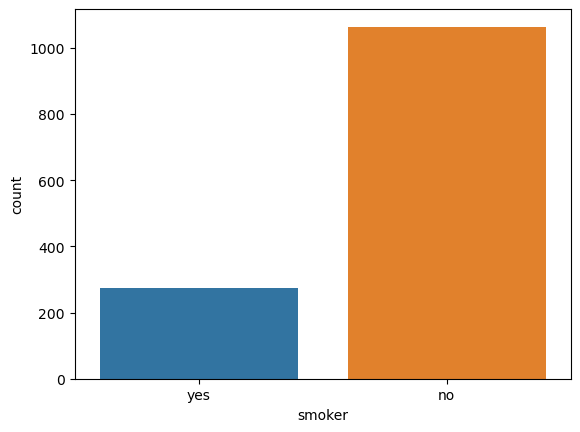

In [34]:
sns.countplot(x=data["smoker"])

<AxesSubplot:xlabel='region', ylabel='count'>

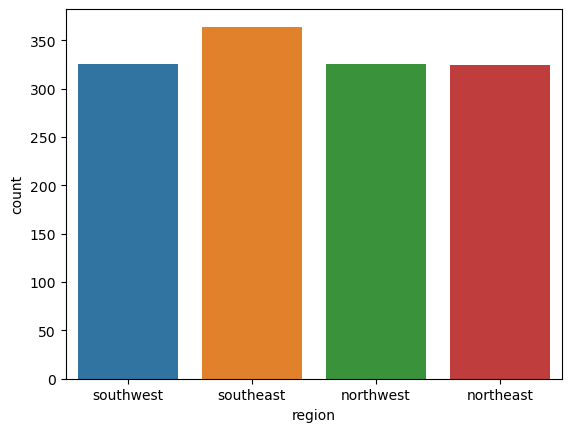

In [35]:
sns.countplot(x=data["region"])

<AxesSubplot:xlabel='region'>

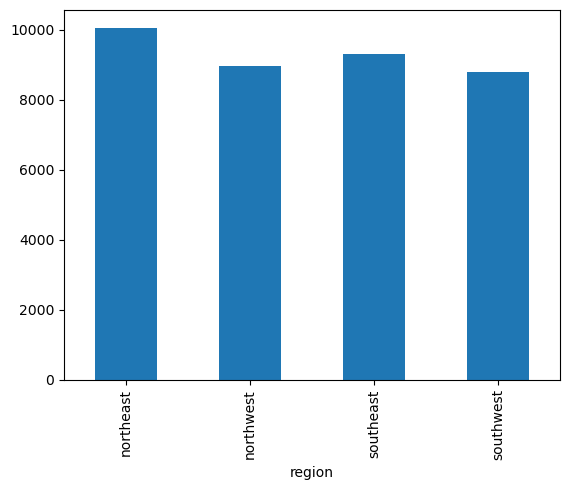

In [36]:
data.groupby("region")["expenses"].median().plot(kind="bar")

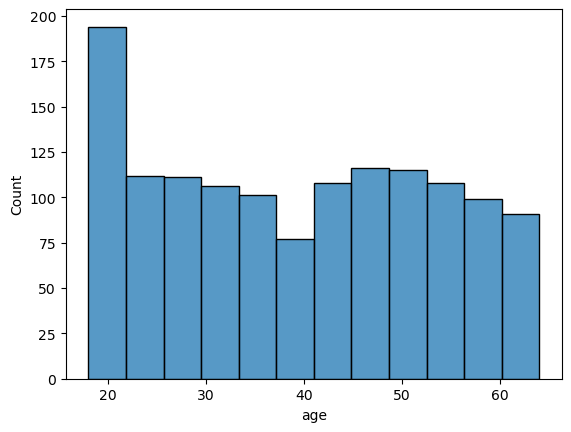

male      676
female    662
Name: sex, dtype: int64


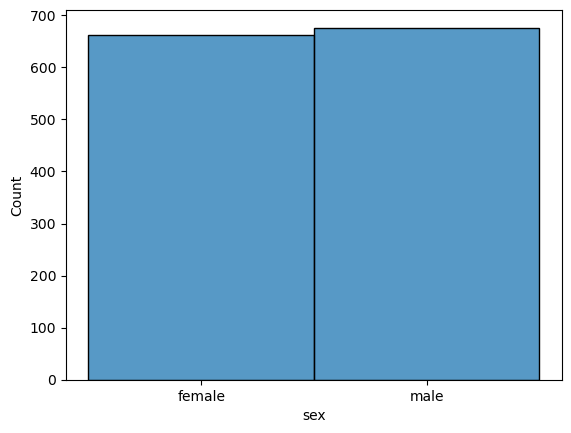

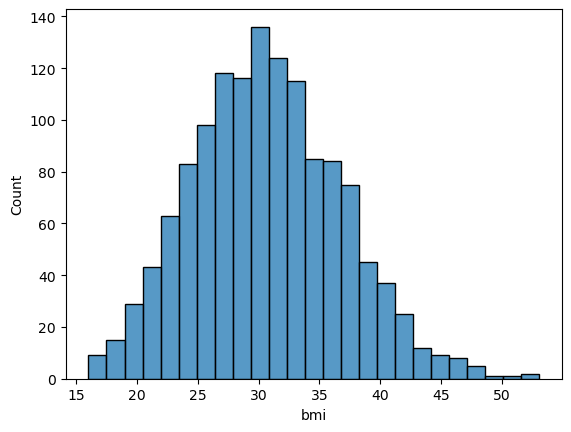

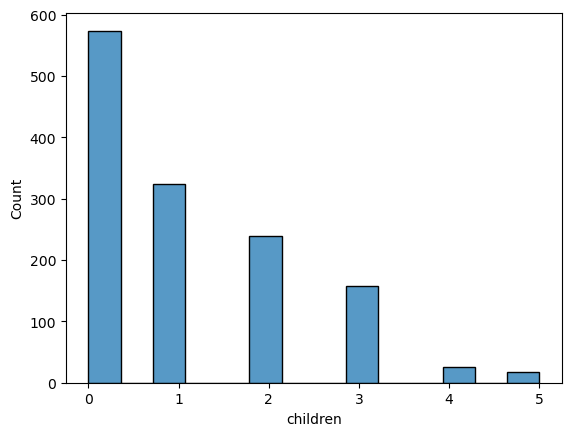

no     1064
yes     274
Name: smoker, dtype: int64


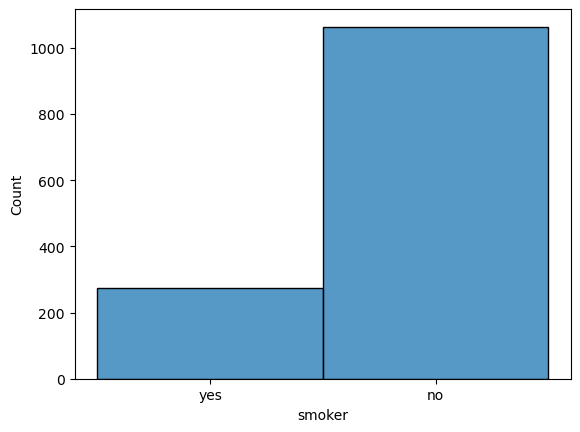

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


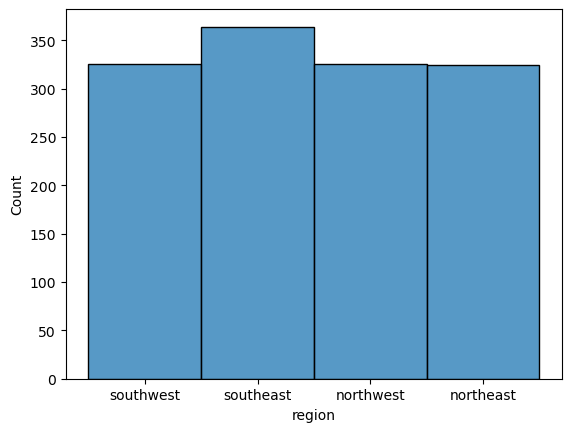

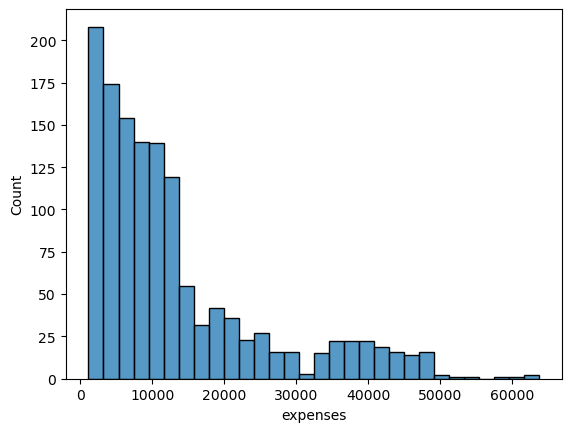

In [37]:

cols = data.columns
for col in cols:
    sns.histplot(data=data[col])
    if data[col].dtype == 'object':
        print(data[col].value_counts())
    plt.show()

<AxesSubplot:>

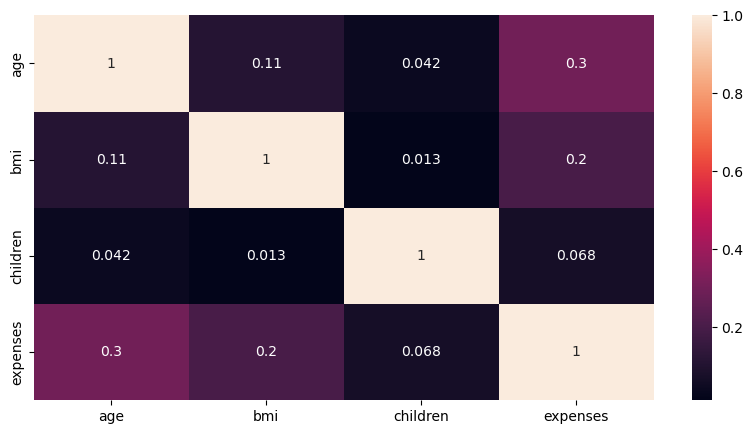

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [39]:
age_bin = [17, 25, 40, 60, np.Inf]
lables = [0, 1, 2, 3]

data['age_bin'] = pd.cut(data["age"], bins=age_bin, labels=lables)

<AxesSubplot:xlabel='age_bin'>

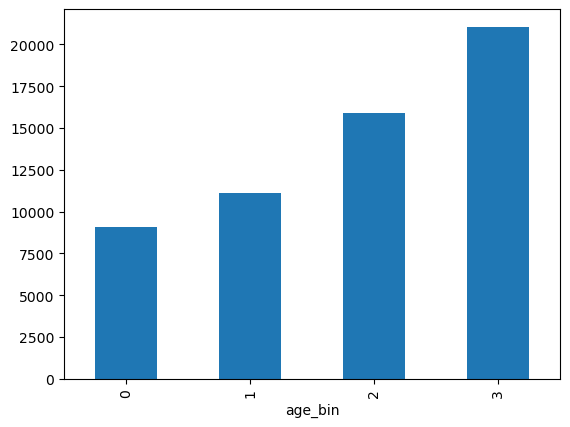

In [40]:
data.groupby("age_bin")["expenses"].mean().plot(kind="bar")

In [41]:
bmi_bin = [0, 18.5, 25, 30, np.Inf]
bmi_lable = [0, 1, 2, 3]
data['bmi_bin'] = pd.cut(data['bmi'], bins=bmi_bin, labels=bmi_lable)

<AxesSubplot:xlabel='bmi_bin'>

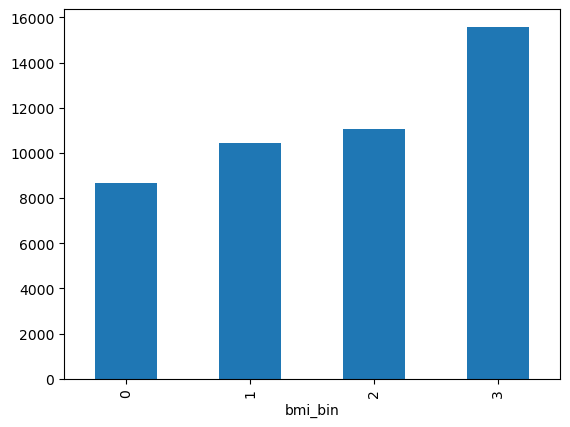

In [42]:
data.groupby("bmi_bin")["expenses"].mean().plot(kind="bar")

In [43]:
data.drop(axis=1, columns=['age', 'bmi'], inplace=True)

In [44]:
data['expenses'] = data['expenses'].apply(np.round)

In [45]:
one = OneHotEncoder()

In [46]:
df = one.fit_transform(data[['sex', 'smoker', 'region']]).toarray()
ohe_labels = one.get_feature_names_out(['sex', 'smoker', 'region'])
df = pd.DataFrame(df, columns=ohe_labels)
df

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [47]:
data.drop(columns=['sex', 'smoker', 'region'], axis=0, inplace=True)

d = pd.concat([data, df], axis=1)

d

,children,expenses,age_bin,bmi_bin,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,16885.0,0,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1726.0,0,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,4449.0,1,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,21984.0,1,1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,3867.0,1,2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,3,10601.0,2,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,0,2206.0,0,3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,0,1630.0,0,3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,0,2008.0,0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [48]:
from sklearn.model_selection import train_test_split

In [50]:
x=d.drop(["expenses"],axis=1)
y=d.expenses

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.20, shuffle=True)

In [52]:
x_train.shape,y_train.shape

((1070, 11), (1070,))